# Basic Intro
https://www.youtube.com/watch?v=pDdP0TFzsoQ
https://github.com/patrickloeber/pytorchTutorial

In [23]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
num_epochs = 4
batch_size = 4
learning_rate = 0.001

In [11]:
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((05, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [15]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [18]:
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

torch.Size([4, 3, 32, 32]) torch.Size([4])


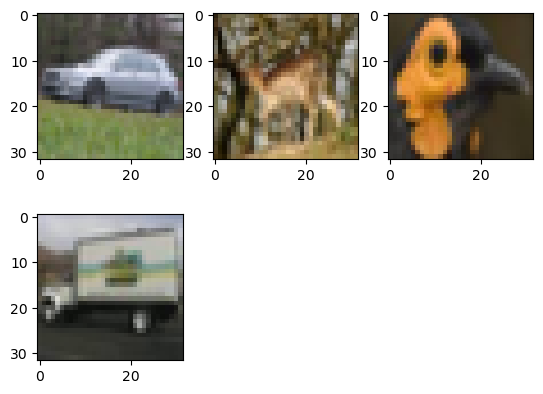

In [46]:
for i in range(4):
    plt.subplot(2, 3, i+1)
    image = samples[i] / 2 + 0.5     # unnormalize
    image_np = image.numpy()
    plt.imshow(np.transpose(image_np, (1, 2, 0)))
#     image = cv2.cvtColor(samples[i][0], cv2.COLOR_BGR2RGB)
#     pixels = np.array(image)
#     plt.imshow(samples[i][0].numpy())

In [29]:
print(samples[i][0].numpy())

[[-0.4588235  -0.44313723 -0.3960784  ...  0.34901965  0.27058828
   0.2313726 ]
 [-0.4823529  -0.4823529  -0.41960782 ... -0.27843136 -0.29411763
  -0.1607843 ]
 [-0.4823529  -0.4588235  -0.44313723 ...  0.09803927  0.20784318
   0.30196083]
 ...
 [ 0.03529418 -0.10588235 -0.19215685 ... -0.08235294 -0.03529412
  -0.10588235]
 [ 0.00392163 -0.01960784 -0.15294117 ... -0.00392157  0.0196079
  -0.08235294]
 [-0.0745098  -0.00392157 -0.06666666 ... -0.04313725  0.02745104
  -0.08235294]]


(3, 32, 32)


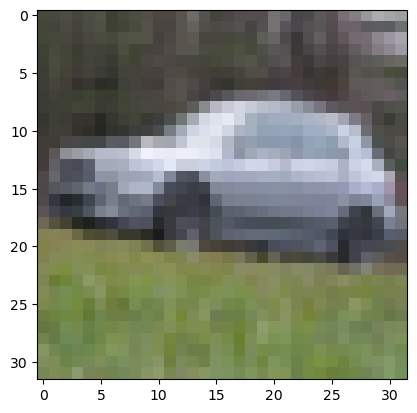

In [45]:
image = samples[0] / 2 + 0.5     # unnormalize
image_np = image.numpy()
print(image_np.shape)
plt.imshow(np.transpose(image_np, (1, 2, 0)))

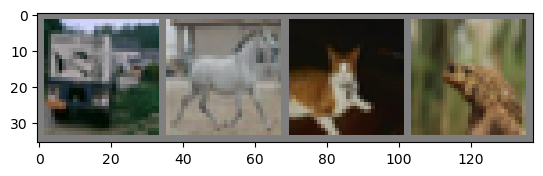

In [43]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))